# Extensive apriltag detection
In this code, we perform apriltag detection and trajectory estimation for a larger set of tags. Firstly, we define a dataframe which not only holds the coordinates of the tags, but also normal vectors indicating their orientation. This serves as a more general framework for arbitrary mapped geometries.

In [1]:
import pandas as pd

# Define the data as a list of dictionaries
data = [
    {"tag_id": 0, "x": 0, "y": 997.5, "z": 1575.5, "normal_x": 1, "normal_y": 0, "normal_z": 0, "size": 89},
    {"tag_id": 1, "x": 0, "y": 2623.5, "z": 1575.5, "normal_x": 1, "normal_y": 0, "normal_z": 0, "size": 89},
    {"tag_id": 2, "x": 0, "y": 4396.5, "z": 1575.5, "normal_x": 1, "normal_y": 0, "normal_z": 0, "size": 89},
    {"tag_id": 3, "x": 0, "y": 6196.5, "z": 1575.5, "normal_x": 1, "normal_y": 0, "normal_z": 0, "size": 89},
    {"tag_id": 4, "x": 1177.5, "y": 0, "z": 1575.5, "normal_x": 0, "normal_y": 1, "normal_z": 0, "size": 89},
    {"tag_id": 5, "x": 2437.5, "y": 0, "z": 1575.5, "normal_x": 0, "normal_y": 1, "normal_z": 0, "size": 89},
    {"tag_id": 6, "x": 4036.5, "y": 0, "z": 1575.5, "normal_x": 0, "normal_y": 1, "normal_z": 0, "size": 89},
    {"tag_id": 7, "x": 6489.5, "y": 0, "z": 1575.5, "normal_x": 0, "normal_y": 1, "normal_z": 0, "size": 89},
    {"tag_id": 8, "x": 8660.5, "y": 0, "z": 1575.5, "normal_x": 0, "normal_y": 1, "normal_z": 0, "size": 89},
    {"tag_id": 9, "x": 10418.5, "y": 0, "z": 1575.5, "normal_x": 0, "normal_y": 1, "normal_z": 0, "size": 89},
    {"tag_id": 10, "x": 11186, "y": 922.5, "z": 1575.5, "normal_x": -1, "normal_y": 0, "normal_z": 0, "size": 89},
    {"tag_id": 11, "x": 11186, "y": 2723.5, "z": 1575.5, "normal_x": -1, "normal_y": 0, "normal_z": 0, "size": 89},
    {"tag_id": 12, "x": 11186, "y": 4511.5, "z": 1575.5, "normal_x": -1, "normal_y": 0, "normal_z": 0, "size": 89},
    {"tag_id": 13, "x": 11186, "y": 6270.5, "z": 1575.5, "normal_x": -1, "normal_y": 0, "normal_z": 0, "size": 89},
    {"tag_id": 14, "x": 734.5, "y": 7400, "z": 1575.5, "normal_x": 0, "normal_y": -1, "normal_z": 0, "size": 89},
    {"tag_id": 15, "x": 2769.5, "y": 7400, "z": 1575.5, "normal_x": 0, "normal_y": -1, "normal_z": 0, "size": 89},
    {"tag_id": 16, "x": 4977.5, "y": 7400, "z": 1575.5, "normal_x": 0, "normal_y": -1, "normal_z": 0, "size": 89},
    {"tag_id": 17, "x": 6375.5, "y": 7400, "z": 1575.5, "normal_x": 0, "normal_y": -1, "normal_z": 0, "size": 89},
    {"tag_id": 18, "x": 7624.5, "y": 7400, "z": 1575.5, "normal_x": 0, "normal_y": -1, "normal_z": 0, "size": 89},
    {"tag_id": 19, "x": 10217.5, "y": 7400, "z": 1575.5, "normal_x": 0, "normal_y": -1, "normal_z": 0, "size": 89},
]

# Create the DataFrame
tags_df = pd.DataFrame(data)

# divide the x, y, and z columns by 1000 to convert from mm to m
tags_df['x'] = tags_df['x'] / 1000
tags_df['y'] = tags_df['y'] / 1000
tags_df['z'] = tags_df['z'] / 1000
tags_df['size'] = tags_df['size'] / 1000

#correct tags 14-19, by flipping the x values
tags_df.loc[tags_df['tag_id'] > 13, 'x'] = 11.186 - tags_df['x'][tags_df['tag_id'] > 13]

#correct the orientation in the coordinate system
tags_df['x'] = 11.186 - tags_df['x']

#correct tags 4-19, by flipping the y values
tags_df.loc[tags_df['tag_id'] > 3, 'y'] = 7.4 - tags_df['y'][tags_df['tag_id'] > 3]

#flip all normals
tags_df['normal_x'] = -tags_df['normal_x']
tags_df['normal_y'] = -tags_df['normal_y']
# Display the DataFrame
print(tags_df)

#export to csv
tags_df.to_csv('tags.csv', index=False)

    tag_id        x       y       z  normal_x  normal_y  normal_z   size
0        0  11.1860  0.9975  1.5755        -1         0         0  0.089
1        1  11.1860  2.6235  1.5755        -1         0         0  0.089
2        2  11.1860  4.3965  1.5755        -1         0         0  0.089
3        3  11.1860  6.1965  1.5755        -1         0         0  0.089
4        4  10.0085  7.4000  1.5755         0        -1         0  0.089
5        5   8.7485  7.4000  1.5755         0        -1         0  0.089
6        6   7.1495  7.4000  1.5755         0        -1         0  0.089
7        7   4.6965  7.4000  1.5755         0        -1         0  0.089
8        8   2.5255  7.4000  1.5755         0        -1         0  0.089
9        9   0.7675  7.4000  1.5755         0        -1         0  0.089
10      10   0.0000  6.4775  1.5755         1         0         0  0.089
11      11   0.0000  4.6765  1.5755         1         0         0  0.089
12      12   0.0000  2.8885  1.5755         1      

In [2]:
#read the csv
tags_df = pd.read_csv('tags.csv')

In [3]:
from pyneon import get_sample_data, NeonDataset, NeonRecording

# Download sample data (if not existing) and return the path
sample_dir = "C:/Users/jan-gabriel.hartel/Documents/GitHub/PyNeon/data/RuhrApril"
print(sample_dir)

dataset = NeonDataset(sample_dir)

print(dataset)

C:/Users/jan-gabriel.hartel/Documents/GitHub/PyNeon/data/RuhrApril
NeonDataset | 5 recordings


Next, we provide the tag positions. In our case, the tags were placed in a rectangle on a whiteboard. We dfine the center of the whiteboard as our origin, with x pointing forward, y left and z up. We further provide the size of the printed tags. Using this information, the code calculates the camera position whenever at least one tag is detected

In [4]:
for recording in dataset.recordings:
    print("Recording: ", recording)
    recording.detect_apriltags()
    


Recording:  
Recording ID: 58f09e69-6f0b-4e44-a418-d276d1fb637f
Wearer ID: eb40d09b-9f09-4ccf-b56b-c1ff8ffd9f4e
Wearer name: Jan
Recording start time: 2024-12-11 15:56:53.576000
Recording duration: 34.771s
                 exist                 filename                                                                                                                      path
3d_eye_states     True        3d_eye_states.csv        C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\RuhrApril\april_sidetoside_far-58f09e69\3d_eye_states.csv
blinks            True               blinks.csv               C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\RuhrApril\april_sidetoside_far-58f09e69\blinks.csv
events            True               events.csv               C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\RuhrApril\april_sidetoside_far-58f09e69\events.csv
fixations         True            fixations.csv            C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\dat

In [5]:
for recording in dataset.recordings:
    recording.compute_camera_positions(tags_df, overwrite=True)

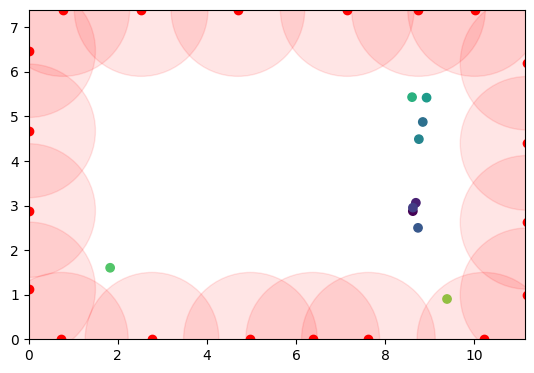

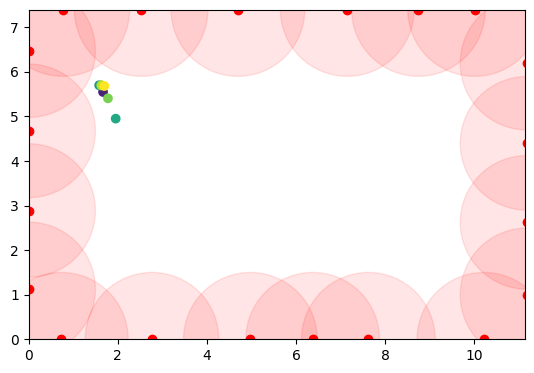

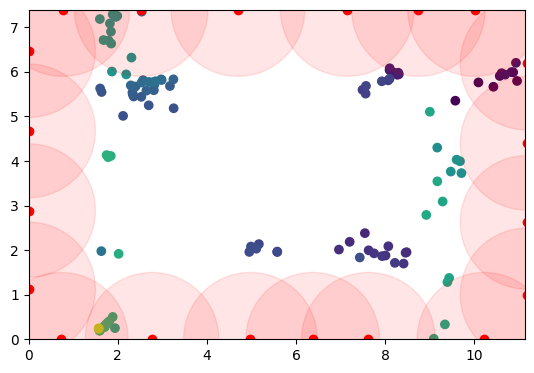

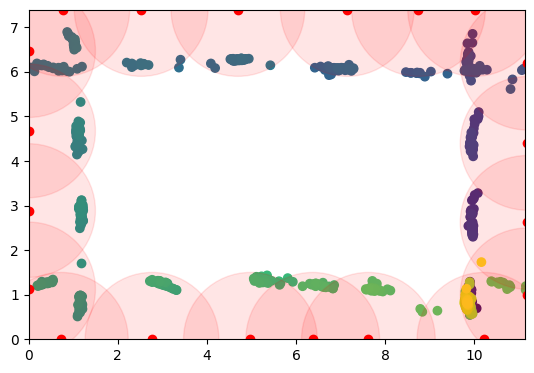

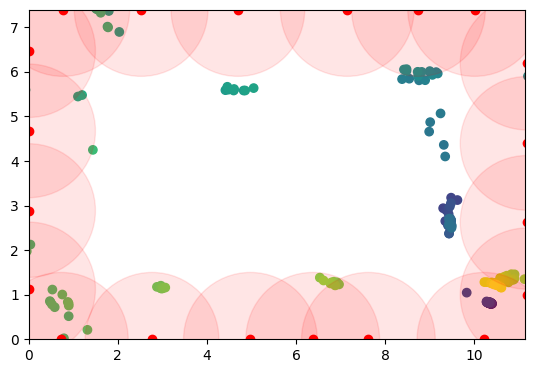

In [6]:
#plot the trajectory in xy for each recording

import matplotlib.pyplot as plt
import numpy as np

for i, recording in enumerate(dataset.recordings):
    #read from json file
    file = recording.recording_dir / "camera_positions.json"
    camera_position = pd.read_json(file, orient="records")
    
    x = camera_position['camera_pos'].apply(lambda x: x[0]).values  # Extract x values
    y = camera_position['camera_pos'].apply(lambda x: x[1]).values  # Extract y values
    colors = np.arange(len(x))  # Create a color array based on the index

    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x, y, c=colors, cmap='viridis')
    ax.set_xlim([0, 11.13])
    ax.set_ylim([0, 7.39])

    for i in range(len(tags_df)):
        #draw tag positions as red dots
        ax.plot(tags_df['x'][i], tags_df['y'][i], 'ro')
        circle = plt.Circle((tags_df['x'][i], tags_df['y'][i]), 1.5, color='red', alpha=0.1)
        ax.add_patch(circle)

    ax.set_aspect('equal', 'box')
    plt.show()


We can further use Kalman filtering to obtain a more robust estimate of the current location, minimising the impact of errors

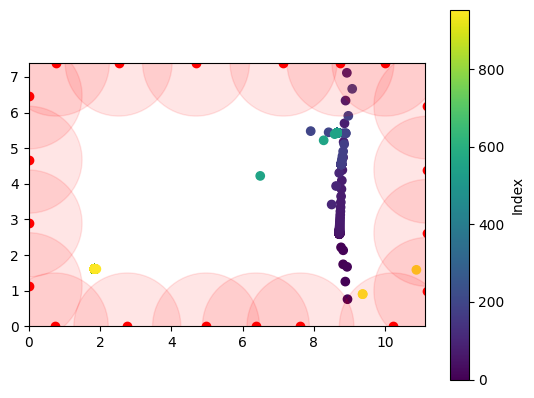

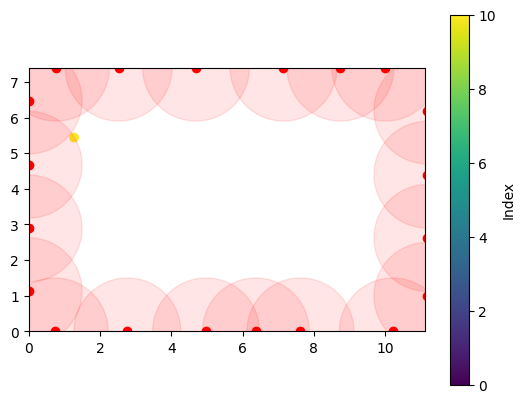

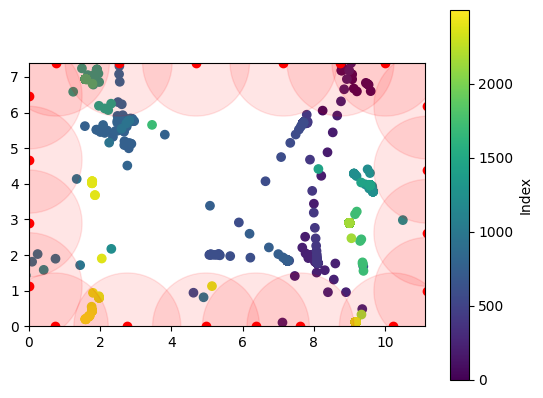

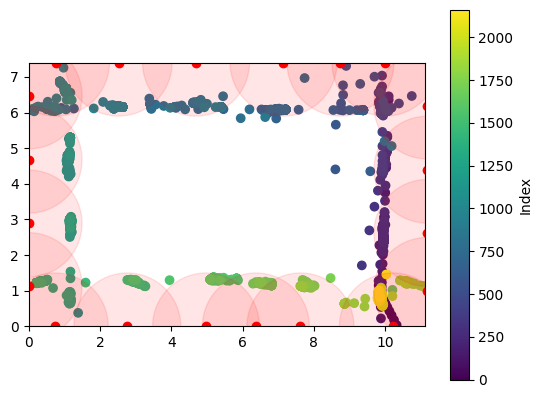

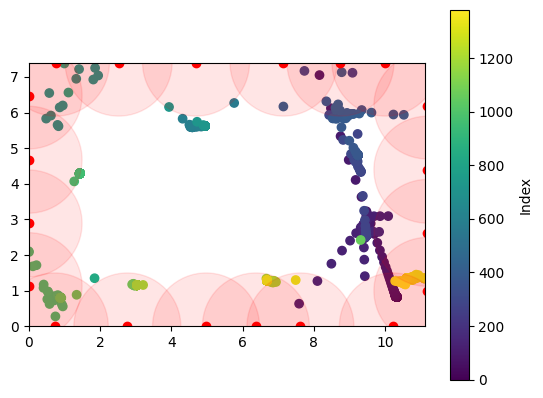

In [10]:
for recording in dataset.recordings:
    camera_position = recording.smooth_camera_pose(initial_state_noise=10,
                                                    process_noise=0.5,
                                                    measurement_noise=0.5,
                                                    gating_threshold=2,
                                                    bidirectional=True)

    x = (camera_position['smoothed_camera_pos'].apply(lambda x: x[0]).values)  # Extract x values
    y = camera_position['smoothed_camera_pos'].apply(lambda x: x[1]).values   # Extract y values
    colors = np.arange(len(x))  # Create a color array based on the index

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim([0, 11.13])
    ax.set_ylim([0, 7.39])
    scatter = ax.scatter(x, y, c=colors, cmap='viridis')

    # Draw tag positions with semi-transparent red circles
    for i in range(len(tags_df)):
        #draw tag positions as red dots
        ax.plot(tags_df['x'][i], tags_df['y'][i], 'ro')
        circle = plt.Circle((tags_df['x'][i], tags_df['y'][i]), 1.5, color='red', alpha=0.1)
        ax.add_patch(circle)
    plt.colorbar(scatter, label='Index')
    ax.set_aspect('equal', 'box')
    plt.show()


In [8]:
from pyneon import NeonDataset
from pyneon.vis import overlay_detections_and_positions
recording = dataset.recordings[3]

file = recording.recording_dir / "camera_positions.json"
camera_position = pd.read_json(file, orient="records")

file = recording.recording_dir / "apriltags.json"
april_detections = pd.read_json(file, orient="records", lines=True)

room_corners = np.array([[0, 0], [11.189, 0], [11.189, 7.39], [0, 7.39]])
output_path = "overlay.mp4"
overlay_detections_and_positions(recording, april_detections, camera_position, room_corners, output_path)

KeyError: 'smoothed_camera_pos'

In [9]:
#show the trajectories of the camera position in x, y and z

x = camera_position['camera_pos'].apply(lambda x: x[0]).values  # Extract x values
y = camera_position['camera_pos'].apply(lambda x: x[1]).values  # Extract y values
z = camera_position['camera_pos'].apply(lambda x: x[2]).values  # Extract z values

fig = plt.figure()
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.plot(z, label='z')

plt.legend()
plt.show()


KeyError: 'camera_pos'

# Sensor fusion